In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL # Image lib
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url, cache_dir='.', untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
# List of all directory and sub directory
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

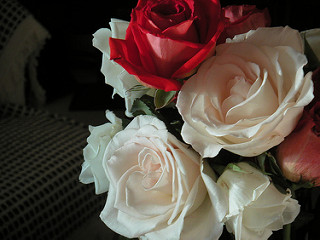

In [7]:
PIL.Image.open(str(roses[1]))

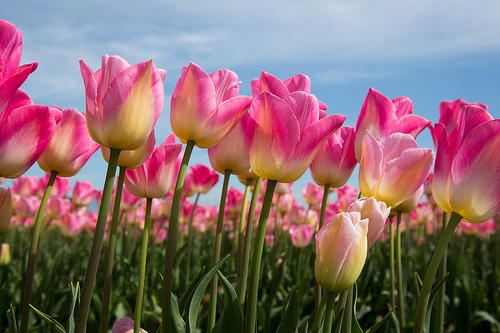

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[3]))

In [9]:
flower_image_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [10]:
flower_image_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [11]:
flower_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [12]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img.shape

(240, 179, 3)

In [13]:
# We are resizing it bcz ML expect all training data in same shape
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [14]:
X, y = [], []

for flower_name, images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [15]:
X = np.array(X)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
X_trained_scaled = X_train / 255
X_test_scaled = X_test / 255

In [19]:
num_classes = 5

model = Sequential([
#   It means we have 16 filter with the size = 3x3
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
#   Dense network
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
#   If we dnt specify any activation it uses Linear activation
    layers.Dense(num_classes)
    
])

model.compile(optimizer='adam',
             loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(X_trained_scaled, y_train, epochs=10)


Epoch 1/10
86/86 [==============================] - 15s 176ms/step - loss: 1.3898 - accuracy: 0.4055
Epoch 2/10
86/86 [==============================] - 14s 157ms/step - loss: 1.0389 - accuracy: 0.5796
Epoch 3/10
86/86 [==============================] - 16s 183ms/step - loss: 0.8778 - accuracy: 0.6708
Epoch 4/10
86/86 [==============================] - 21s 243ms/step - loss: 0.7114 - accuracy: 0.7286
Epoch 5/10
86/86 [==============================] - 21s 243ms/step - loss: 0.5458 - accuracy: 0.7972
Epoch 6/10
86/86 [==============================] - 25s 288ms/step - loss: 0.3536 - accuracy: 0.8765
Epoch 7/10
86/86 [==============================] - 41s 471ms/step - loss: 0.1998 - accuracy: 0.9382
Epoch 8/10
86/86 [==============================] - 41s 472ms/step - loss: 0.1059 - accuracy: 0.9742
Epoch 9/10
86/86 [==============================] - 41s 471ms/step - loss: 0.0686 - accuracy: 0.9833
Epoch 10/10
86/86 [==============================] - 41s 472ms/step - loss: 0.0758 - accura

In [20]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 7s 227ms/step - loss: 1.7644 - accuracy: 0.6438


[1.7644132375717163, 0.6437908411026001]

In [21]:
predictions = model.predict(X_test_scaled)
predictions

array([[  5.791267  ,  14.531206  ,   0.9228539 , -11.264762  ,
         -2.325848  ],
       [  6.677882  ,   0.7669273 ,  -3.7196286 ,  -3.7090101 ,
          4.3842716 ],
       [ -4.799216  ,   0.86958903,  13.4026985 , -10.131656  ,
         -6.0373435 ],
       ...,
       [  0.9471801 ,   4.7312512 ,  -4.93299   ,   5.879001  ,
          5.047702  ],
       [  1.1159984 ,   1.580233  ,  -1.6159546 ,   1.8732212 ,
         -3.6204925 ],
       [  1.7500013 ,  -6.822614  ,  -0.52636606,   8.269911  ,
          3.4351637 ]], dtype=float32)

In [22]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.6003787e-04, 9.9983871e-01, 1.2299785e-06, 6.2644620e-12,
       4.7753424e-08], dtype=float32)>

In [23]:
np.argmax(score)

1

In [24]:
y_test[0]

1

In [30]:
## Data Augmentation


data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
#     layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

NotImplementedError: Cannot convert a symbolic Tensor (rotation_matrix/strided_slice:0) to a numpy array.

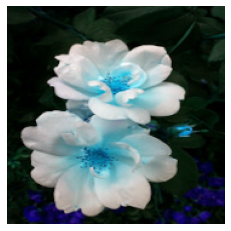

In [26]:
plt.axis('off')
plt.imshow(X[0])

NameError: name 'data_augmentation' is not defined

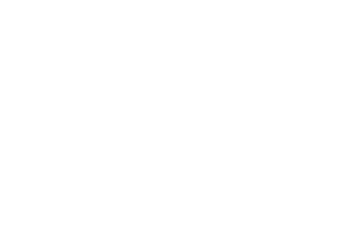

In [27]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [ ]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    
])

model.compile(optimizer='adam',
             loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(X_trained_scaled, y_train, epochs=10)
